In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
Train = pd.read_csv(r"F:\DATA\Kaggle_projects\Spring 2025 Regression Challenge\Training_Dataset.csv")
Test = pd.read_csv(r"F:\DATA\Kaggle_projects\Spring 2025 Regression Challenge\Test_Dataset.csv")
sample = pd.read_csv(r"F:\DATA\Kaggle_projects\Spring 2025 Regression Challenge\Sample_Submission.csv")

In [48]:
Train.head()

,Composition (X),Property (Y)
0,8.06,0.0742
1,1.76,0.7080
2,3.35,0.5150
3,3.79,0.7060
4,5.46,0.5030


In [49]:
Train.describe()

,Composition (X),Property (Y)
count,50.000000,50.000000
mean,5.886600,0.543336
std,2.419715,0.501293
min,1.190000,-0.151000
25%,4.152500,0.314250
50%,6.145000,0.461000
75%,8.020000,0.660750
max,9.690000,2.680000


75% and max of Y are too far apart this means we need to see it what is going on

In [50]:
Train.corr()

,Composition (X),Property (Y)
Composition (X),1.000000,0.114452
Property (Y),0.114452,1.000000


[]

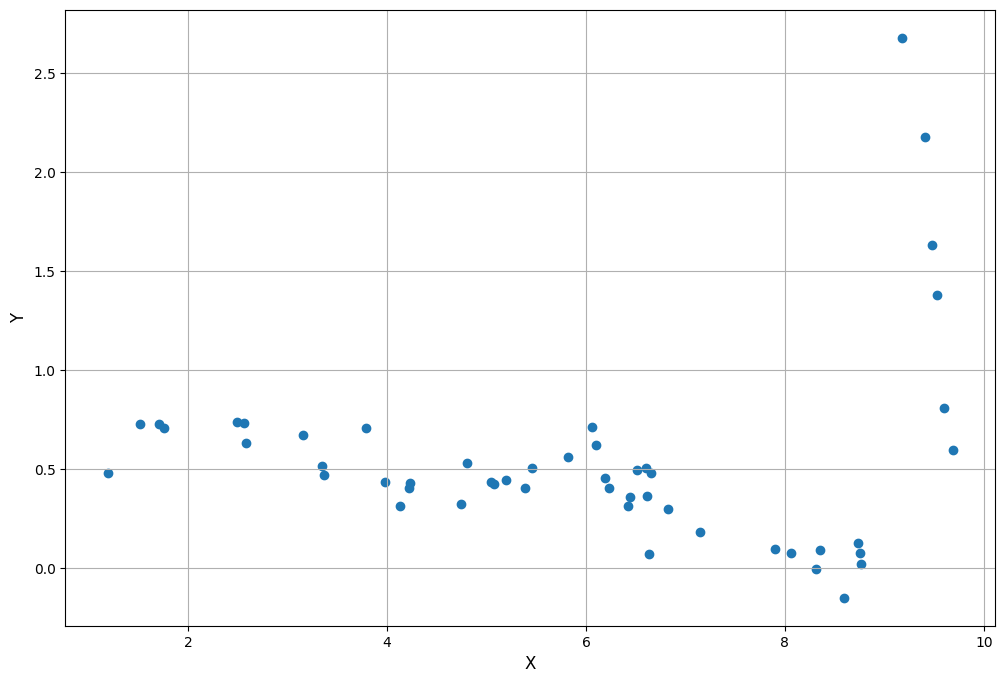

In [51]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.scatter(Train['Composition (X)'],Train['Property (Y)'])
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.plot()

In [52]:
out_lier = Train[(Train['Composition (X)'] > 8) & (Train['Property (Y)'] > 0.5)]
out_lier

,Composition (X),Property (Y)
17,9.48,1.630
20,9.60,0.810
31,9.41,2.180
36,9.18,2.680
44,9.69,0.597
45,9.53,1.380


In [53]:
Fresh_Train = Train.drop(out_lier.index)
Fresh_Train.describe()

,Composition (X),Property (Y)
count,44.000000,44.000000
mean,5.396364,0.406586
std,2.149194,0.230861
min,1.190000,-0.151000
25%,3.932500,0.307500
50%,5.640000,0.435000
75%,6.635000,0.538500
max,8.760000,0.738000


In [54]:
Trainx = Fresh_Train.iloc[:, :-1]
Trainy = Fresh_Train.iloc[:, -1]

In [55]:
Trainx.head()

,Composition (X)
0,8.06
1,1.76
2,3.35
3,3.79
4,5.46


In [56]:
Trainy.head()

0    0.0742
1    0.7080
2    0.5150
3    0.7060
4    0.5030
Name: Property (Y), dtype: float64

In [57]:
Fresh_Train.corr()

,Composition (X),Property (Y)
Composition (X),1.000000,-0.801408
Property (Y),-0.801408,1.000000


# OLS regression

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Trainx, Trainy)
y_pre = model.predict(Trainx)

In [59]:
mse_train = mean_squared_error(Trainy, y_pre)
mae_train = mean_absolute_error(Trainy, y_pre)
r2_train = r2_score(Trainy, y_pre)

print("Evaluation metrics: Train Data by OLS")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data by OLS
Mean absolute error:  0.10425034113920327
Mean squared error:  0.018633326636182376
R-squared score:  0.6422546848105137


In [60]:
Test.head()

,Composition (X)
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04


In [61]:
test_pre = model.predict(Test)
Test['Property (Y)'] = test_pre
Test.head()

,Composition (X),Property (Y)
0,0.00,0.871133
1,0.01,0.870272
2,0.02,0.869412
3,0.03,0.868551
4,0.04,0.867690


In [62]:
# Test.to_csv('submission.csv', index=False)

# Checking Robust Regressions

# Huber regression

In [63]:
htrain_x = Train.iloc[:, :-1]
htrain_y = Train.iloc[:, -1]

In [64]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
model.fit(htrain_x, htrain_y)
y_pre = model.predict(htrain_x)

In [65]:
mse_train = mean_squared_error(htrain_y, y_pre)
mae_train = mean_absolute_error(htrain_y, y_pre)
r2_train = r2_score(htrain_y, y_pre)

print("Evaluation metrics: Train Data by Huber")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data by Huber
Mean absolute error:  0.26999575629469097
Mean squared error:  0.29961682205111534
R-squared score:  -0.21662742885017994


# Ransac regression

In [66]:
rtrain_x = Train.iloc[:, :-1]
rtrain_y = Train.iloc[:, -1]

In [67]:
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
model.fit(rtrain_x, rtrain_y)
y_pre = model.predict(rtrain_x)

In [68]:
mse_train = mean_squared_error(rtrain_y, y_pre)
mae_train = mean_absolute_error(rtrain_y, y_pre)
r2_train = r2_score(rtrain_y, y_pre)

print("Evaluation metrics: Train Data by Ransac")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data by Ransac
Mean absolute error:  0.27783740756543013
Mean squared error:  0.3631183068398234
R-squared score:  -0.4744822703699738


# Theil-sen regression

In [69]:
tstrain_x = Train.iloc[:, :-1]
tstrain_y = Train.iloc[:, -1]

In [70]:
from sklearn.linear_model import TheilSenRegressor
model = TheilSenRegressor()
model.fit(tstrain_x, tstrain_y)
y_pre = model.predict(tstrain_x)

In [71]:
mse_train = mean_squared_error(tstrain_y, y_pre)
mae_train = mean_absolute_error(tstrain_y, y_pre)
r2_train = r2_score(tstrain_y, y_pre)

print("Evaluation metrics: Train Data by Theil-Sen")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data by Theil-Sen
Mean absolute error:  0.27048485109239256
Mean squared error:  0.29660560177583606
R-squared score:  -0.20440003401922624


# other regression models
## ridge

In [72]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(tstrain_x, tstrain_y)
y_pre = model.predict(tstrain_x)
print(tstrain_x.shape, y_pre.shape)

(50, 1) (50,)


In [73]:
r2_train = r2_score(tstrain_y, y_pre)
print("Evaluation metrics: Train Data by ridge regression")
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data by ridge regression
R-squared score:  0.01309913353509351


## polynomial

In [74]:
# Pipeline function provides a framework for building and evaluating ML pipelines viz., a sequence of data preprocessing steps and machine learning models that are executed in a specific order
from sklearn.pipeline import Pipeline

#PolynomialFeatures function generates new set of polynomial and interaction features using the existing features
#E.g., for a 2D input sample of the form [a,b], the second degree polynomial features are [1, a, b, a^2, b^2, ab]
from sklearn.preprocessing import PolynomialFeatures

#LinearRegression class provides the functionality of the Ordinary least squares Linear Regression model
from sklearn.linear_model import LinearRegression

In [81]:
x = tstrain_x.reset_index(drop=True)
y = tstrain_y